In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pdf
import yfinance as yf

In [2]:
#-- Load data
# data = pd.read_csv(r"")

data = yf.download('BTC-USD', '2022-01-01','2024-03-01')

#-- all column names lowercase
data.columns = map(str.lower, data.columns)


[*********************100%***********************]  1 of 1 completed


In [3]:
data

,open,high,low,close,adj close,volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
...,...,...,...,...,...,...
2024-02-25,51565.214844,51950.027344,51306.171875,51733.238281,51733.238281,15413239245
2024-02-26,51730.539062,54938.175781,50931.031250,54522.402344,54522.402344,34074411896
2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031


In [4]:
#-- all column names lowercase
data.columns = map(str.lower, data.columns)


def calc_true_range(data):
    return np.maximum.reduce([
        data['high'] - data['low'],
        abs(data['high'] - data['close'].shift()),
        abs(data['low'] - data['close'].shift())
        ])

#-- Change window_size at your own discretion
#-- 14 is common window chosen in ATR calculation
window_size = 14
def chopp_idx_signals(data, window_size ):
    #-- Calculate ATR, highest high, lowest low & choppiness index
    data['true_range'] = calc_true_range(data)
    data['ATR'] = data['true_range'].rolling(window = window_size).mean()
    data['highest_high'] = data['high'].rolling(window =window_size).max()
    data['lowest_low'] = data['low'].rolling(window =window_size).min()
    #-- Choppiness Index
    data['sum_true_range'] = data['true_range'].rolling(window = window_size).sum()
    data['range'] = data['highest_high'] - data['lowest_low']
    data['chop'] = 100 * np.log10(data['sum_true_range'] / data['range']) /np.log10(window_size)
    data['chop'] = data['chop'].clip(lower = 0, upper = 100)
    #-- buy & sell signals based on Choppiness Index
    data['chop_lag1'] = data['chop'].shift()
    data['signal'] = np.where((data['chop'] < 30) & (data['chop_lag1'] >= 30), "Buy Signal",
                              np.where((data['chop'] > 60 ) & (data['chop_lag1'] <= 60),"Sell Signal", "Neutral"))
    return data
    

chopp_idx_signals(data, window_size)

,open,high,low,close,adj close,volume,true_range,ATR,highest_high,lowest_low,sum_true_range,range,chop,chop_lag1,signal
Date,,,,,,,,,,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,1024.468750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362,1674.761719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905,1654.082031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,4130.824219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,51565.214844,51950.027344,51306.171875,51733.238281,51733.238281,15413239245,643.855469,1470.362444,52945.050781,47745.761719,20585.074219,5199.289062,52.141511,51.719689,Neutral
2024-02-26,51730.539062,54938.175781,50931.031250,54522.402344,54522.402344,34074411896,4007.144531,1575.535993,54938.175781,48406.496094,22057.503906,6531.679688,46.114524,52.141511,Neutral
2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031,3053.640625,1654.232143,57537.839844,49296.832031,23159.250000,8241.007812,39.153057,46.114524,Neutral


In [5]:
data[data['signal']=='Buy Signal']

,open,high,low,close,adj close,volume,true_range,ATR,highest_high,lowest_low,sum_true_range,range,chop,chop_lag1,signal
Date,,,,,,,,,,,,,,,
2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722,2390.253906,1435.375837,46827.546875,37680.734375,20095.261719,9146.812500,29.824233,36.518776,Buy Signal
2022-05-12,28936.734375,30032.439453,26350.490234,29047.751953,29047.751953,66989173272,3681.949219,2135.027483,39902.949219,26350.490234,29890.384766,13552.458984,29.971643,31.162060,Buy Signal
2022-06-13,26737.578125,26795.589844,22141.257812,22487.388672,22487.388672,68204556440,4654.332031,1521.843192,32249.863281,22141.257812,21305.804688,10108.605469,28.252227,47.651726,Buy Signal
2022-08-28,20041.035156,20139.054688,19616.814453,19616.814453,19616.814453,24366810591,522.240234,830.288644,25135.589844,19616.814453,11624.041016,5518.775391,28.226726,30.949106,Buy Signal
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,2907.766602,864.568150,21446.886719,15682.692383,12103.954102,5764.194336,28.111053,36.454171,Buy Signal
2023-01-11,17446.359375,17934.896484,17337.994141,17934.896484,17934.896484,18372283782,596.902344,216.813337,17934.896484,16408.474609,3035.386719,1526.421875,26.047653,34.979781,Buy Signal
2023-03-10,20367.001953,20370.595703,19628.253906,20187.244141,20187.244141,39578257695,742.341797,629.160714,23880.632812,19628.253906,8808.250000,4252.378906,27.593573,32.429805,Buy Signal
2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,54622230164,2433.533203,1018.283343,26514.716797,19628.253906,14255.966797,6886.462891,27.571131,34.793308,Buy Signal
2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335,2832.642578,1198.378348,27787.812500,19628.253906,16777.296875,8159.558594,27.314167,30.027606,Buy Signal


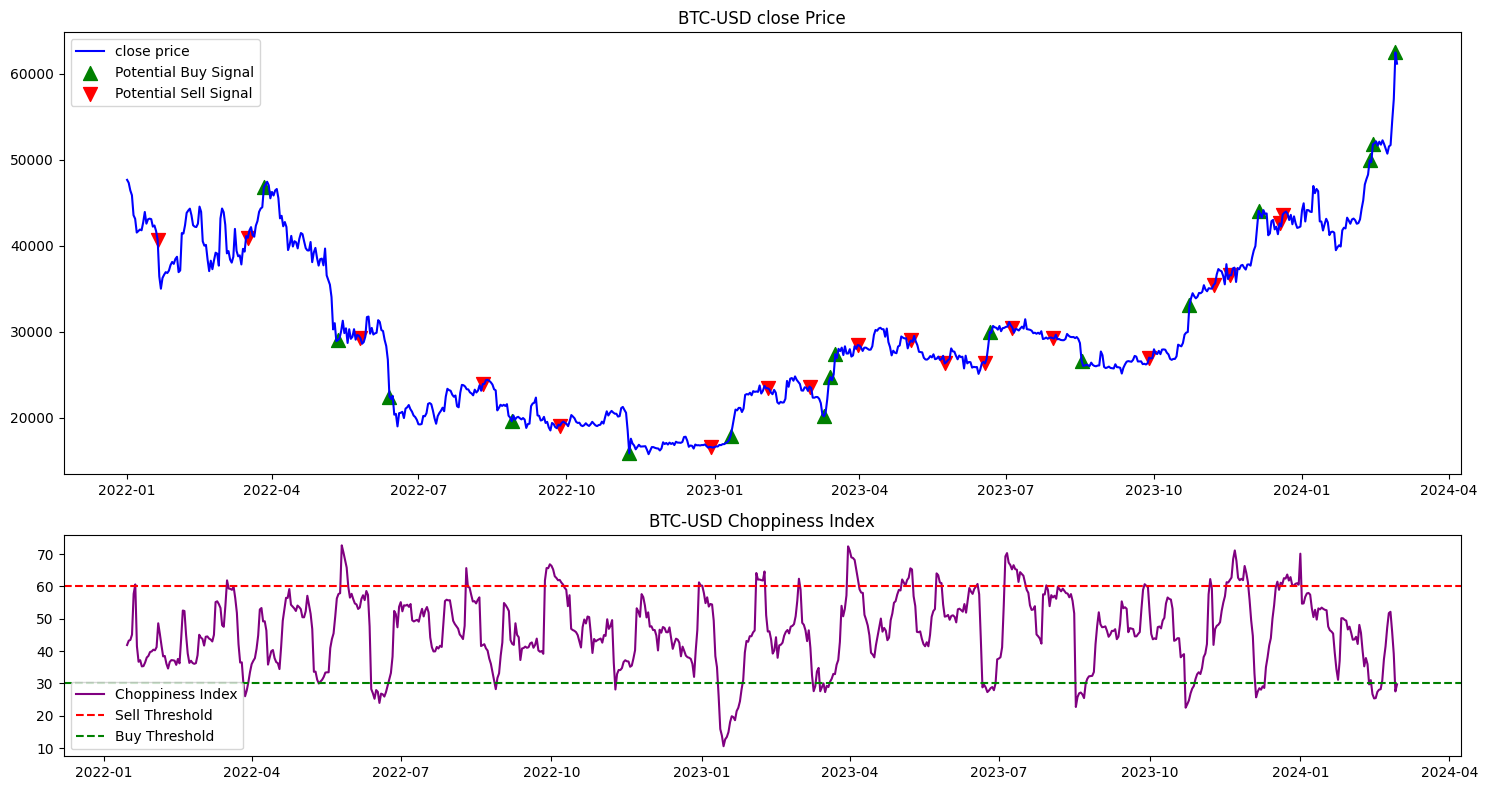

In [6]:
def plot_data(data, ticker):
    """Plot stock prices and signals."""
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})

    ax[0].plot(data['close'], label='close price', color='blue')
    buy_signals = data[data['signal'] == 'Buy Signal']
    sell_signals = data[data['signal'] == 'Sell Signal']
    ax[0].scatter(buy_signals.index, buy_signals['close'], color='green', label='Potential Buy Signal', marker='^', alpha=1, s=100)
    ax[0].scatter(sell_signals.index, sell_signals['close'], color='red', label='Potential Sell Signal', marker='v', alpha=1, s=100)
    ax[0].set_title(f"{ticker} close Price")
    ax[0].legend()

    ax[1].plot(data['chop'], label='Choppiness Index', color='purple')
    ax[1].axhline(60, color='red', linestyle='--', label='Sell Threshold')
    ax[1].axhline(30, color='green', linestyle='--', label='Buy Threshold')
    ax[1].set_title(f"{ticker} Choppiness Index")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_data(data, 'BTC-USD')